<a href="https://colab.research.google.com/github/dasdasqs2/Machine-learning/blob/main/HW/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. 
- 8주차 강의노트에서 wine data를 다루는 예제가 있다. 강의에서 다룬 것처럼 7개의 ‘quality’를
3개의 quality로 재분류한다. 그리고 기존의 test data 정확도 (79.3%)보다 더 좋은 결과가 나오게
끔 신경망의 모델을 수정하거나 하이퍼파라미터(hyperparameter)를 바꾸는 코드를 작성하라.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(42)

In [87]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

HTTPError: ignored

In [ ]:
red['type'] = 0
white['type'] = 1
# mean의 의미-> red:white = 1:3

print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white]) #(red + white) dataframe
print(wine.describe()) #통계적 특징

In [ ]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

In [ ]:
#imbalanced data
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [ ]:
# 7 quality -> 3 quality
wine.loc[wine['quality'] <=5, 'new_quality'] = 0
wine.loc[wine['quality'] ==6, 'new_quality'] = 1
wine.loc[wine['quality'] >=7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

In [ ]:
# data regularization & split test data
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=72, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=48, activation='relu'),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05),loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

# Q2. 8주차 강의노트에서 Fashion MNIST 데이터를 다루는 예제가 있다.
1. Fashion MNIST 데이터를 logistic regression 을 이용하여 학습한 뒤, test data를 적용하여
결과를 얻는다
2. Fashion MNIST 데이터를 수업 중 다룬 MLP로 학습한 뒤, test data를 적용하여 결과를 얻
는다
3. Fashion MNIST 데이터를 MLP로 학습하되, 위에서 학습한 결과보다 더 validation 결과를
얻을 수 있도록 모델을 바꾼 뒤, test data를 적용하여 결과를 얻는다
단, 위의 3문제에서 학습할 때, validation data 비율은 학습데이터의 25%로 둔다.

## 1. Logistic regression

In [92]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

dataset = datasets.load_digits()
x_data = dataset.data
y_data = dataset.target

In [93]:
print(x_data)
print(y_data) 

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [95]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(x_data, y_data, test_size=0.25)

In [98]:
model1 = LogisticRegression(max_iter=100, tol=0.0001, penalty='l2', C=1.0)

model1.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_predict = estimator.predict(test_X) 
score = metrics.accuracy_score(test_Y, y_predict)
print(score)

0.9933333333333333


## 2. MLP

In [115]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X0, train_Y0), (test_X0, test_Y0) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


In [116]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [117]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
history = model2.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25


ValueError: ignored

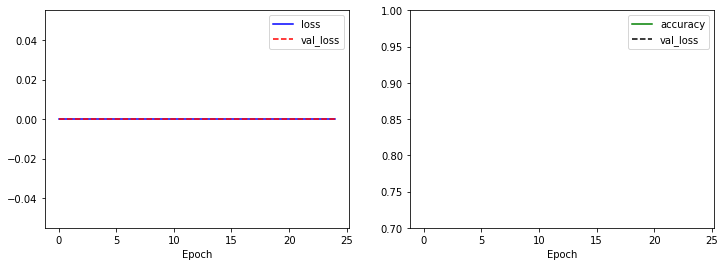

In [69]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [70]:
model2.evaluate(test_X,test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1000


[0.0, 0.10000000149011612]

## 3. best_MLP

In [128]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [122]:
(train_X0, train_Y0), (test_X0, test_Y0) = fashion_mnist.load_data()

# Reshape
train_X = train_X0.reshape(60000,28,28,1)
test_X = test_X0.reshape(10000,28,28,1)

In [123]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [126]:
from keras.utils import to_categorical

train_Y = to_categorical(train_Y0, 10)
test_Y = to_categorical(test_Y0, 10)

In [131]:
model3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [133]:
history = model3.fit(train_X, train_Y, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.7311 - accuracy: 0.7363
Epoch 2/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.3347 - accuracy: 0.8818
Epoch 3/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2854 - accuracy: 0.8984
Epoch 4/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2512 - accuracy: 0.9101
Epoch 5/20
1325/1875 [====================>.........] - ETA: 22s - loss: 0.2293 - accuracy: 0.9151

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [ ]:
model3.evaluate()